Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(3 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster?
* The detailed explanation of the logic of the analysis.

**Question 2.**  _(4 points)_
* What attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis? Provide a complete list of all attributes used.
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 3.**  _(4 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation.

**Questions on Quercus.**  _(4 points)_


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [168]:
df=pd.read_csv("train.csv")
print('Dimension of Data ' , df.shape)
print(df)

Dimension of Data  (891, 12)
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                      

In [37]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
df.columns[df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [40]:
df["Age"].mean()

29.69911764705882

###  Survival Rate Calculation based on different category
##### Tried the manual calcuaiton to understand how the calcualtion works

In [170]:
TotalFemalePassenger=df.query('Sex == "female"')["PassengerId"].count()
survividecountq=df.query('Sex == "female" & Survived=="1"')["PassengerId"].count() 
#/ totalcount["PassengerId"].count()*100
print ("Total Female passenger " + str(TotalFemalePassenger))
print ("Total Female passenger Survived "  + str(survividecountq))

#average people survived.

print("Percentage of women survived "+ str(survividecountq*100/TotalFemalePassenger))


Total Female passenger 314
Total Female passenger Survived 233
Percentage of women survived 74.20382165605096


#### Male Passenger Survival Rate

In [192]:
TotalmalePassenger=df.query('Sex == "male"')["PassengerId"].count()
survivedecountmale=df.query('Sex == "male" & Survived=="1"')["Survived"].count()
print ("Total male passenger " + str(TotalmalePassenger))
print ("Total male passenger survived " + str(survivedecountmale))
#average people survived.
print("Percentage of male survived "+ str(survivedecountmale*100/TotalmalePassenger))


Total male passenger 577
Total male passenger survived 109
Percentage of male survived 18.890814558058924


      Sex  Survived
0  female  0.742038
1    male  0.188908


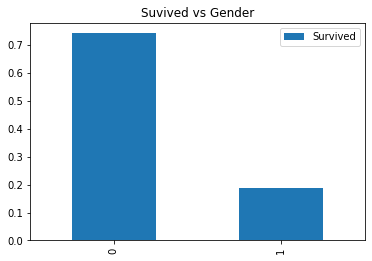

In [190]:
sexg= df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(sexg)
sexg.plot(kind='bar',title='Suvived vs Gender')



   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


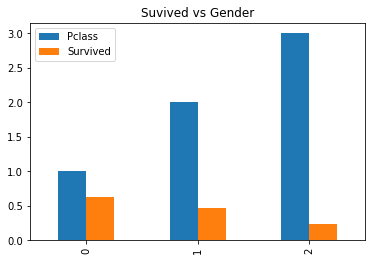

In [179]:
dsurvivedPclass=df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(dsurvivedPclass)
dsurvivedPclass.plot(kind='bar',title='Suvived vs Gender')


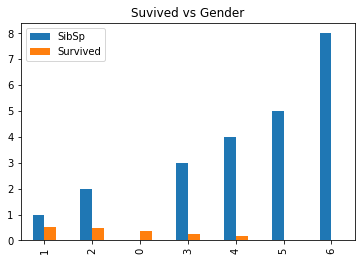

In [180]:
sibsp= df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sibsp.plot(kind='bar',title='Suvived vs Gender')

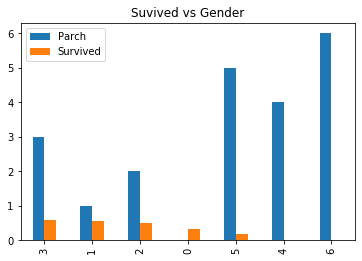

In [181]:
parch= df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
parch.plot(kind='bar',title='Suvived vs Gender')

### Cleaning Data to Fill some missing Values

In [210]:
df['Age'] = df['Age'].interpolate()
df['Cabin'] = df['Cabin'].interpolate()
df['Embarked'] = df['Embarked'].interpolate()

bins = [0,12,18,30,50,80]
labels=['Group1','Group2','Group3','Group4','Group5']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)


binsb = [0,1,100]
labelsb=['FamilywithChildren','NoChildren']
df['FamilyType'] = pd.cut(df['Parch'], bins=binsb, labels=labelsb, include_lowest=True)

print (df)



     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

### PLot Graph to analyse the data

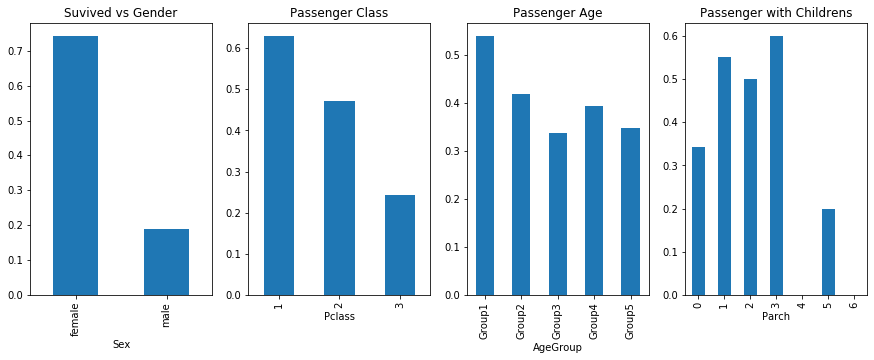

In [198]:
fig, axs = plt.subplots(1,4,figsize=(15,5))

dsurvived=df.loc[df['Survived']==True]
dsurvivedGender = df.groupby(['Sex'])['Survived'].mean()
first = dsurvivedGender.plot(kind='bar',title='Suvived vs Gender',ax=axs[0])


dsurvivedPclass = df.groupby(['Pclass'])['Survived'].mean()
second=dsurvivedPclass.plot(kind='bar',title='Passenger Class',ax=axs[1])


dsurvivedPclass = df.groupby(['AgeGroup'])['Survived'].mean()
second=dsurvivedPclass.plot(kind='bar',title='Passenger Age',ax=axs[2])



dsurvivedPclass = df.groupby(['Parch'])['Survived'].mean()
second=dsurvivedPclass.plot(kind='bar',title='Passenger with Childrens',ax=axs[3])



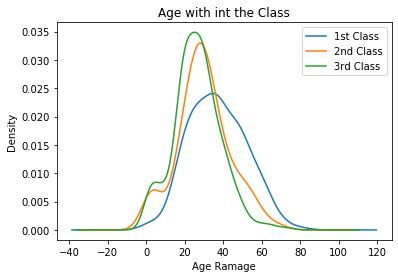

In [199]:
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age Ramage")    
plt.title("Age with int the Class")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 



Text(0.5, 1.0, 'Survival Breakdown (1 = Survived, 0 = Died)')

<Figure size 432x288 with 0 Axes>

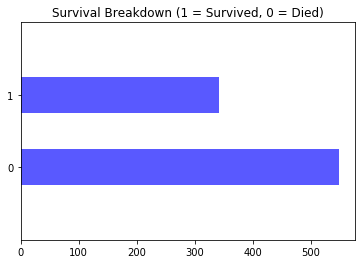

In [163]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

In [207]:
sexandpclass= df[["Sex", "Survived","Pclass"]].groupby(['Sex','Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(sexandpclass)

      Sex  Pclass  Survived
0  female       1  0.968085
1  female       2  0.921053
2  female       3  0.500000
3    male       1  0.368852
4    male       2  0.157407
5    male       3  0.135447


### Survived by Geneder